In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('data/datasets/3410013301.csv', dtype={'STATUS': object, 'TERMINATED': object})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129016 entries, 0 to 129015
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   REF_DATE           129016 non-null  int64  
 1   GEO                129016 non-null  object 
 2   DGUID              128132 non-null  object 
 3   Type of structure  129016 non-null  object 
 4   Type of unit       129016 non-null  object 
 5   UOM                129016 non-null  object 
 6   UOM_ID             129016 non-null  int64  
 7   SCALAR_FACTOR      129016 non-null  object 
 8   SCALAR_ID          129016 non-null  int64  
 9   VECTOR             129016 non-null  object 
 10  COORDINATE         129016 non-null  object 
 11  VALUE              70924 non-null   float64
 12  STATUS             58092 non-null   object 
 13  SYMBOL             0 non-null       float64
 14  TERMINATED         2552 non-null    object 
 15  DECIMALS           129016 non-null  int64  
dtypes:

In [24]:
df.describe()

,REF_DATE,UOM_ID,SCALAR_ID,VALUE,SYMBOL,DECIMALS
count,129016.000000,129016.0,129016.0,70924.000000,0.0,129016.0
mean,2005.339555,81.0,0.0,666.695801,NaN,0.0
std,10.947887,0.0,0.0,314.022695,NaN,0.0
min,1987.000000,81.0,0.0,0.000000,NaN,0.0
25%,1996.000000,81.0,0.0,456.000000,NaN,0.0
50%,2005.000000,81.0,0.0,604.000000,NaN,0.0
75%,2015.000000,81.0,0.0,814.000000,NaN,0.0
max,2024.000000,81.0,0.0,2961.000000,NaN,0.0


In [26]:
## Count null values in each column
df.isnull().sum()

REF_DATE                  0
GEO                       0
DGUID                   884
Type of structure         0
Type of unit              0
UOM                       0
UOM_ID                    0
SCALAR_FACTOR             0
SCALAR_ID                 0
VECTOR                    0
COORDINATE                0
VALUE                 58092
STATUS                70924
SYMBOL               129016
TERMINATED           126464
DECIMALS                  0
dtype: int64

In [27]:
## Count of unique values
df.nunique()

REF_DATE               38
GEO                   244
DGUID                 234
Type of structure       4
Type of unit            4
UOM                     1
UOM_ID                  1
SCALAR_FACTOR           1
SCALAR_ID               1
VECTOR               3640
COORDINATE           3640
VALUE                1882
STATUS                  2
SYMBOL                  0
TERMINATED              1
DECIMALS                1
dtype: int64

In [13]:
## Filter to only 2019 to 2025 data
df = df[(df['REF_DATE'] >= 2019) & (df['REF_DATE'] <= 2025)]

## Drop rows where VALUE is NaN
df = df.dropna(subset=["VALUE"])
# Drop rows where VALUE = 0
df = df[df["VALUE"] != 0]

print(df.shape)
df = df[df['STATUS'] != 'F']
print(df.shape)
## Drop columns that are not needed
df = df.drop(columns=["DGUID", "UOM", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", "VECTOR", "STATUS", "COORDINATE", "SYMBOL", "TERMINATED", "DECIMALS"])

## Filter to only include Ontario geography
df = df[df['GEO'].str.contains("Ontario", case=False)]

## Drop duplicate rows
df = df.drop_duplicates()

df

(12275, 16)
(12275, 16)


,REF_DATE,GEO,Type of structure,Type of unit,VALUE
109576,2019,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",Row and apartment structures of three units an...,Bachelor units,623.0
109577,2019,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",Row and apartment structures of three units an...,One bedroom units,749.0
109578,2019,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",Row and apartment structures of three units an...,Two bedroom units,874.0
109579,2019,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",Row and apartment structures of three units an...,Three bedroom units,969.0
109583,2019,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",Row structures of three units and over,Three bedroom units,1114.0
...,...,...,...,...,...
127890,2024,"Woodstock, Ontario",Apartment structures of three units and over,Two bedroom units,1577.0
127891,2024,"Woodstock, Ontario",Apartment structures of three units and over,Three bedroom units,1758.0
127893,2024,"Woodstock, Ontario",Apartment structures of six units and over,One bedroom units,1425.0
127894,2024,"Woodstock, Ontario",Apartment structures of six units and over,Two bedroom units,1608.0


In [14]:
## Counts of each type of unit
df['Type of unit'].value_counts()

Type of unit
Two bedroom units      1200
One bedroom units      1068
Three bedroom units     808
Bachelor units          641
Name: count, dtype: int64

In [15]:
df_city = (
    df.groupby("GEO")["VALUE"]      # group by city
      .mean()                       # take mean VALUE
      .reset_index()                # make GEO a column again
      .sort_values(by="VALUE", ascending=False)  # sort by VALUE
)
df_city['VALUE'] = df_city['VALUE'].round(3)
df_city['GEO'] = df_city['GEO'].str.split(',').str[0]

df_city

,GEO,VALUE
59,Toronto,1668.663
47,Port Hope,1487.167
40,Ottawa-Gatineau,1479.286
39,Oshawa,1433.671
0,Barrie,1426.451
...,...,...
20,Hawkesbury,800.613
12,Elliot Lake,763.403
61,West Nipissing,755.875
60,West Grey,688.800


In [16]:
df_year = (
    df.groupby("REF_DATE")["VALUE"]  # group by year
      .mean()                        # take mean VALUE
      .reset_index()                 # make REF_DATE a column again
      .sort_values(by="VALUE", ascending=False)  # sort by VALUE
)
df_year['VALUE'] = df_year['VALUE'].round(3)

df_year

,REF_DATE,VALUE
5,2024,1317.357
4,2023,1260.640
3,2022,1169.008
2,2021,1098.908
1,2020,1035.369
0,2019,979.732


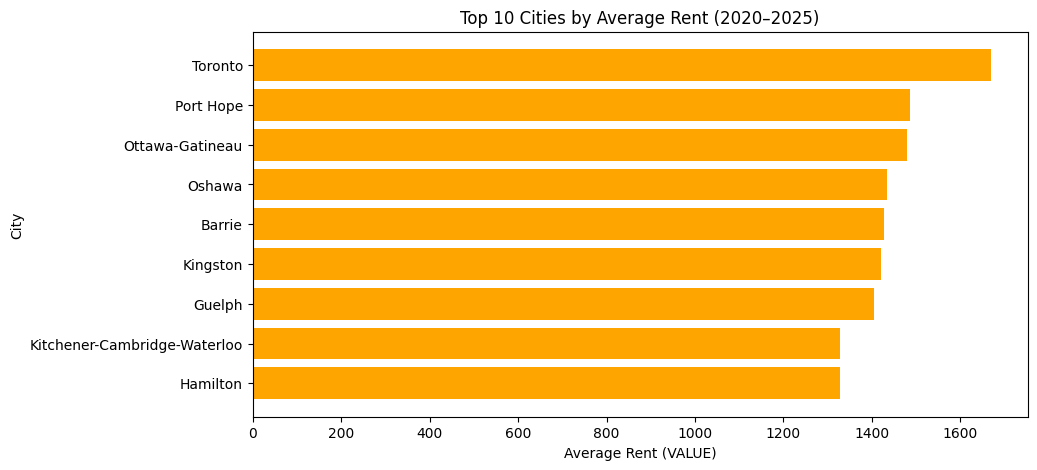

In [17]:
top_cities = df_city.head(10)  # take top 10
plt.figure(figsize=(10, 5))
plt.barh(top_cities["GEO"], top_cities["VALUE"], color="orange")
plt.xlabel("Average Rent (VALUE)")
plt.ylabel("City")
plt.title("Top 10 Cities by Average Rent (2020–2025)")
plt.gca().invert_yaxis()  # highest at top
plt.show()

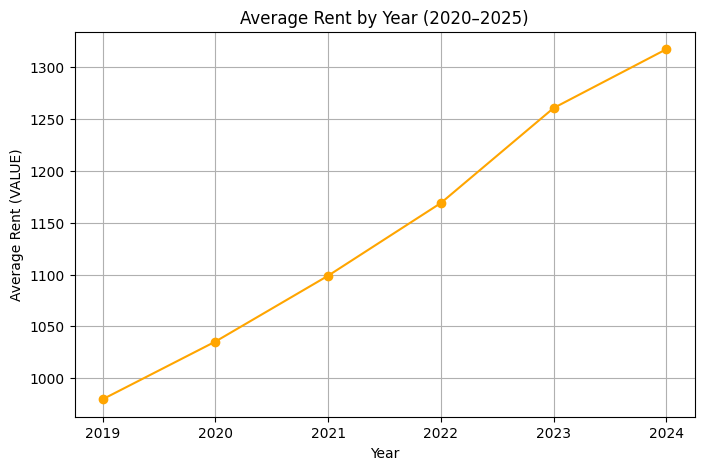

In [18]:
# ✅ Plot 2: Average Rent by Year
plt.figure(figsize=(8, 5))
plt.plot(df_year["REF_DATE"], df_year["VALUE"], marker="o", color="orange")
plt.xlabel("Year")
plt.ylabel("Average Rent (VALUE)")
plt.title("Average Rent by Year (2020–2025)")
plt.grid(True)
plt.show()

In [19]:
## Rename columns
df = df.rename(columns={
    "REF_DATE": "Year",
    "GEO": "City",
    "VALUE": "Rent Price"
})
df['City'] = df['City'].str.split(',').str[0]

df

,Year,City,Type of structure,Type of unit,Rent Price
109576,2019,Ottawa-Gatineau,Row and apartment structures of three units an...,Bachelor units,623.0
109577,2019,Ottawa-Gatineau,Row and apartment structures of three units an...,One bedroom units,749.0
109578,2019,Ottawa-Gatineau,Row and apartment structures of three units an...,Two bedroom units,874.0
109579,2019,Ottawa-Gatineau,Row and apartment structures of three units an...,Three bedroom units,969.0
109583,2019,Ottawa-Gatineau,Row structures of three units and over,Three bedroom units,1114.0
...,...,...,...,...,...
127890,2024,Woodstock,Apartment structures of three units and over,Two bedroom units,1577.0
127891,2024,Woodstock,Apartment structures of three units and over,Three bedroom units,1758.0
127893,2024,Woodstock,Apartment structures of six units and over,One bedroom units,1425.0
127894,2024,Woodstock,Apartment structures of six units and over,Two bedroom units,1608.0


In [20]:
## Save cleaned dataset
df.to_csv('data/cleaned_datasets/cleaned_3410013301.csv')

In [21]:
df['City'].unique()

array(['Ottawa-Gatineau', 'Hawkesbury', 'Barrie', 'Belleville',
       'Bracebridge', 'Brantford', 'Brighton', 'Brock', 'Brockville',
       'Centre Wellington', 'Chatham-Kent', 'Cobourg', 'Collingwood',
       'Cornwall', 'Elliot Lake', 'Essex', 'Gravenhurst',
       'Greater Napanee', 'Greater Sudbury', 'Guelph', 'Haldimand County',
       'Hamilton', 'Huntsville', 'Ingersoll', 'Kawartha Lakes', 'Kenora',
       'Kincardine', 'Kings Subdivision', 'Kingston',
       'Kitchener-Cambridge-Waterloo', 'Lambton Shores', 'Leamington',
       'London', 'Meaford', 'Midland', 'Norfolk', 'North Bay',
       'North Perth', 'Orillia', 'Oshawa', 'Owen Sound', 'Pembroke',
       'Petawawa', 'Peterborough', 'Port Hope', 'Prince Edward',
       'St. Catharines-Niagara', 'Sarnia', 'Saugeen Shores',
       'Sault Ste. Marie', 'Scugog', 'Stratford', 'The Nation',
       'Thunder Bay', 'Tillsonburg', 'Timmins', 'Toronto', 'West Grey',
       'West Nipissing', 'Windsor', 'Woodstock'], dtype=object)

In [22]:
## Ontario cities
cities = df["City"].unique().tolist()

import json
with open("frontend/public/cities.json", "w") as f:
    json.dump(cities, f)